<a href="https://colab.research.google.com/github/sourcecode369/Kaggle-Notebooks/blob/master/Tutorials/Tavolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tavolo

In [ ]:
import tensorflow as tf
import tavolo as tvl
tf.__version__

'2.2.0'

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
# Build model
model = tf.keras.Sequential([tf.keras.layers.Input(shape=(784,)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Must call compile with optimizer before test
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0002), loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1), metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 9s 2ms/step - loss: 0.8060 - accuracy: 0.9109
Epoch 2/10
6000/6000 [==============================] - 9s 2ms/step - loss: 0.6609 - accuracy: 0.9596
Epoch 3/10
6000/6000 [==============================] - 9s 2ms/step - loss: 0.6255 - accuracy: 0.9720
Epoch 4/10
6000/6000 [==============================] - 9s 1ms/step - loss: 0.6063 - accuracy: 0.9781
Epoch 5/10
6000/6000 [==============================] - 9s 2ms/step - loss: 0.5936 - accuracy: 0.9827
Epoch 6/10
2058/6000 [=========>....................] - ETA: 5s - loss: 0.5839 - accuracy: 0.9861

In [ ]:
lr_finder = tvl.learning.LearningRateFinder(model=model)

learning_rates, losses = lr_finder.scan(X_train, y_train, min_lr=0.00001, max_lr=0.001, batch_size=128)

### Plot the results to choose your learning rate

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

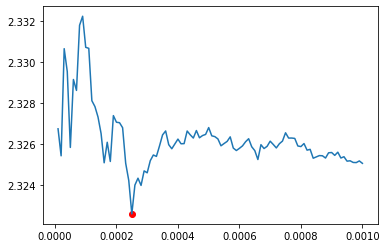

In [ ]:
plt.plot(learning_rates, losses)
plt.scatter(learning_rates[losses.index(min(losses))],min(losses),color='r')